In [121]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [122]:
diabetes_DS = pd.read_csv('data/diabetes.csv')

In [123]:
diabetes_DS.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [124]:
diabetes_DS.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [125]:
diabetes_DS.shape

(768, 9)

In [126]:
diabetes_DS['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0 - Non-Diabetic \
1 - Diabetic

In [127]:
df = diabetes_DS.groupby('Outcome').mean().T

In [128]:
df

Outcome,0,1
Pregnancies,3.298000,4.865672
Glucose,109.980000,141.257463
BloodPressure,68.184000,70.824627
SkinThickness,19.664000,22.164179
Insulin,68.792000,100.335821
BMI,30.304200,35.142537
DiabetesPedigreeFunction,0.429734,0.550500
Age,31.190000,37.067164


This formula calculates the percentage difference between values in columns labeled 0 and 1 in the DataFrame 'df'. The result is then stored in a new column labeled '%diff'. This formula is commonly used to measure the relative difference between two values.

In [129]:
df['%diff'] = (abs(df[0] - df[1] )/ ((df[0] + df[1])/2)) *100

In [130]:
df

Outcome,0,1,%diff
Pregnancies,3.298000,4.865672,38.406044
Glucose,109.980000,141.257463,24.898725
BloodPressure,68.184000,70.824627,3.799227
SkinThickness,19.664000,22.164179,11.954520
Insulin,68.792000,100.335821,37.301753
BMI,30.304200,35.142537,14.785572
DiabetesPedigreeFunction,0.429734,0.550500,24.640239
Age,31.190000,37.067164,17.220651


In [131]:
data = diabetes_DS.drop(columns= 'Outcome', axis=1)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

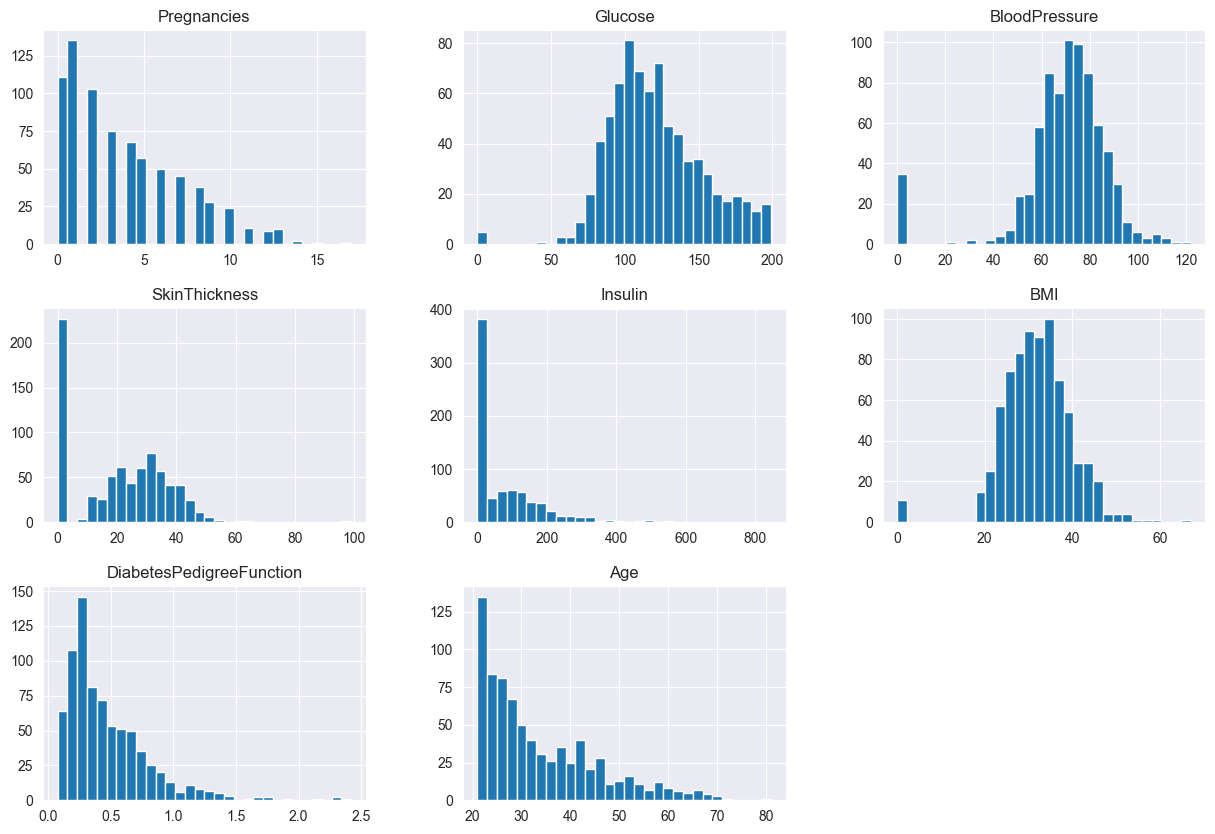

In [133]:
data.hist(bins=30, figsize=(15,10))
plt.show()

In [134]:
from pandas.plotting import scatter_matrix

<Axes: >

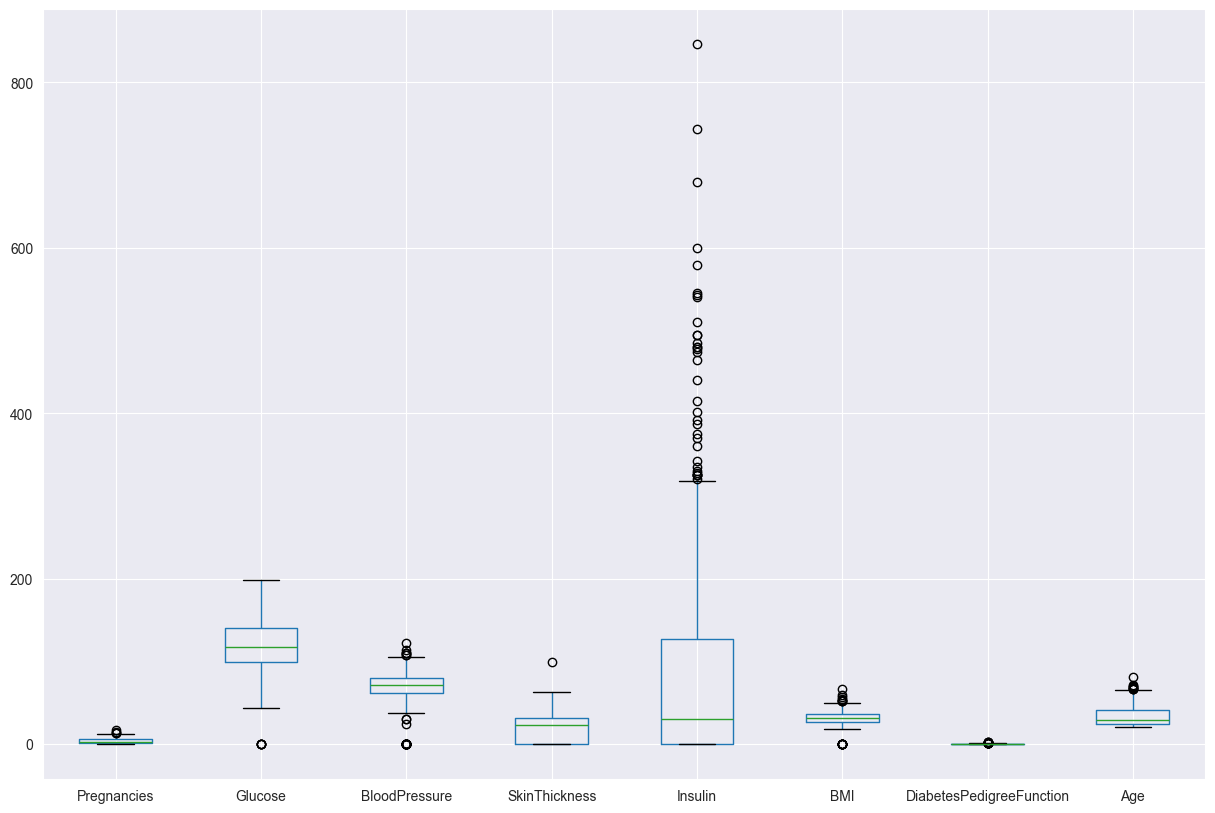

In [135]:
data.boxplot(figsize=(15,10))

In [136]:
corr_matrix = data.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


<Axes: >

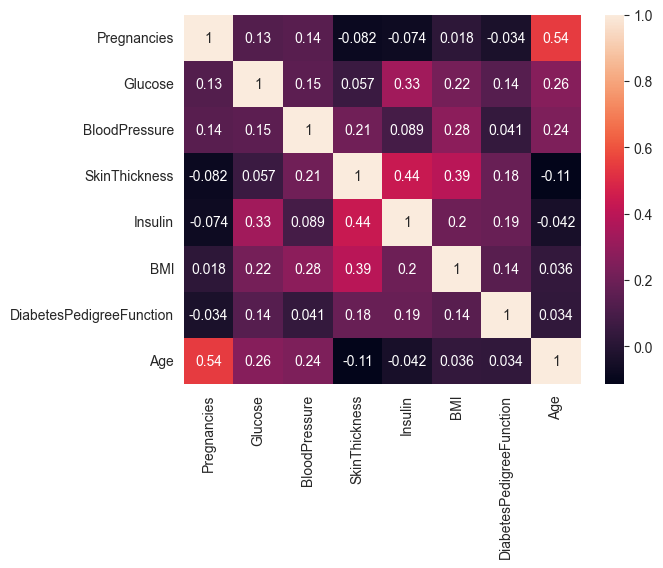

In [137]:
sns.heatmap(corr_matrix, annot= True)

# preprocessing
handling missing or zero values in a dataset

In [138]:
# Calculate the median value for BMI
median_bmi = diabetes_DS['BMI'].median()
# Substitute it in the BMI column of the
# dataset where values are 0
diabetes_DS['BMI'] = diabetes_DS['BMI'].replace(
    to_replace=0, value=median_bmi)

median_bloodp = diabetes_DS['BloodPressure'].median()
# Substitute it in the BloodP column of the
# dataset where values are 0
diabetes_DS['BloodPressure'] = diabetes_DS['BloodPressure'].replace(
    to_replace=0, value=median_bloodp)

# Calculate the median value for PlGlcConc
median_plglcconc = diabetes_DS['Glucose'].median()
# Substitute it in the PlGlcConc column of the
# dataset where values are 0
diabetes_DS['Glucose'] = diabetes_DS['Glucose'].replace(
    to_replace=0, value=median_plglcconc)

# Calculate the median value for SkinThick
median_skinthick = diabetes_DS['SkinThickness'].median()
# Substitute it in the SkinThick column of the
# dataset where values are 0
diabetes_DS['SkinThickness'] = diabetes_DS['SkinThickness'].replace(
    to_replace=0, value=median_skinthick)

# Calculate the median value for SkinThick
median_skinthick = diabetes_DS['Insulin'].median()
# Substitute it in the SkinThick column of the
# dataset where values are 0
diabetes_DS['Insulin'] = diabetes_DS['Insulin'].replace(
    to_replace=0, value=median_skinthick)

Use Z-scores to identify and filter out the outliers.

In [139]:
from scipy import stats
# Define a threshold for the Z-score
z_threshold = 3
# Calculate the Z-scores for each column
z_scores = stats.zscore(diabetes_DS)

# Create a boolean mask for outliers
outlier_mask = (abs(z_scores) < z_threshold).all(axis=1)

# Filter the dataset to remove outliers
diabetes_DS2 = diabetes_DS[outlier_mask]

# Print information about the removed outliers
outliers_removed = diabetes_DS.shape[0] - diabetes_DS2.shape[0]
print(f"Number of outliers removed: {outliers_removed}")

Number of outliers removed: 49


<Axes: >

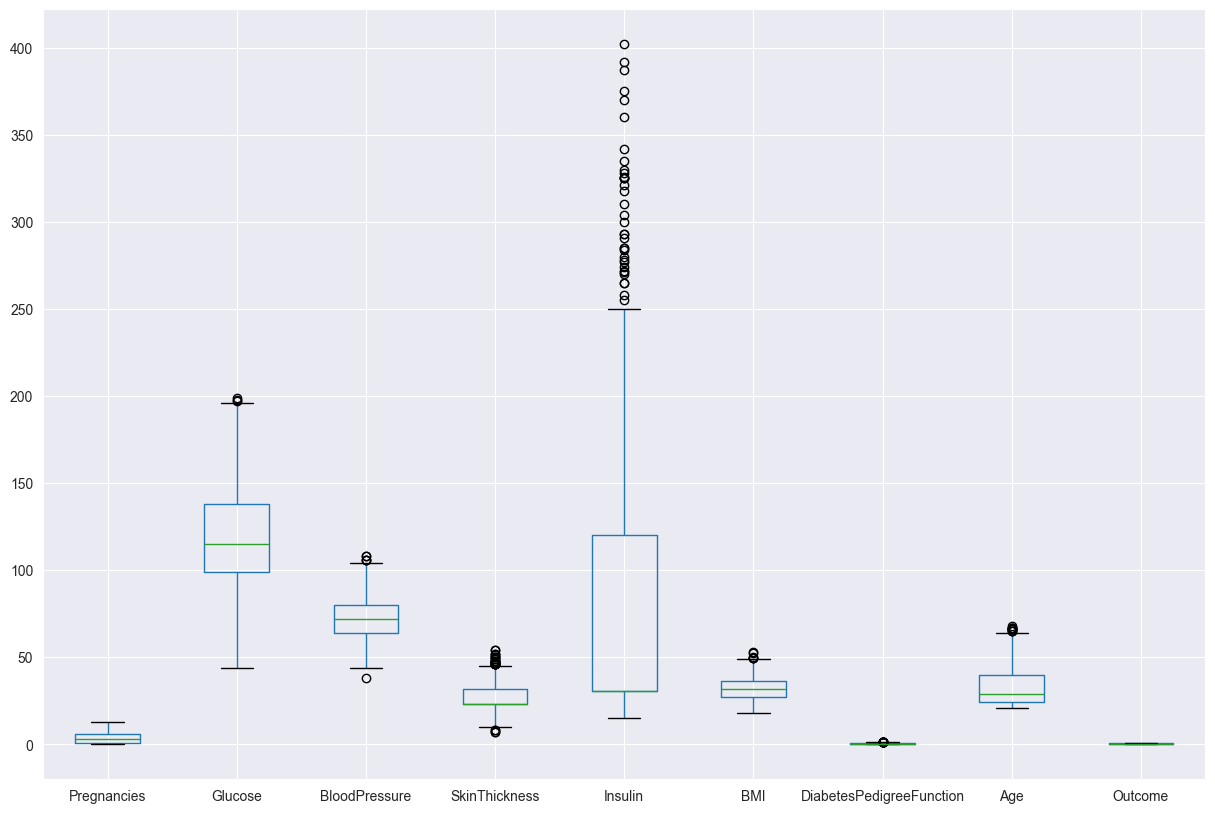

In [140]:
diabetes_DS2.boxplot(figsize=(15,10))

# Feature Engineering

In [141]:
def set_bmi(row):
    if row["BMI"] < 18.5:
        return "Under"
    elif row["BMI"] >= 18.5 and row["BMI"] <= 24.9:
        return "Healthy"
    elif row["BMI"] >= 25 and row["BMI"] <= 29.9:
        return "Over"
    elif row["BMI"] >= 30:
        return "Obese"

diabetes_DS2 = diabetes_DS2.assign(BM_DESC=diabetes_DS2.apply(set_bmi, axis=1))

diabetes_DS2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BM_DESC
0,6,148,72,35,30.5,33.6,0.627,50,1,Obese
1,1,85,66,29,30.5,26.6,0.351,31,0,Over
2,8,183,64,23,30.5,23.3,0.672,32,1,Healthy
3,1,89,66,23,94.0,28.1,0.167,21,0,Over
5,5,116,74,23,30.5,25.6,0.201,30,0,Over


In [142]:
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

diabetes_DS2 = diabetes_DS2.assign(INSULIN_DESC=diabetes_DS2.apply(set_insulin, axis=1))

diabetes_DS2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BM_DESC,INSULIN_DESC
0,6,148,72,35,30.5,33.6,0.627,50,1,Obese,Normal
1,1,85,66,29,30.5,26.6,0.351,31,0,Over,Normal
2,8,183,64,23,30.5,23.3,0.672,32,1,Healthy,Normal
3,1,89,66,23,94.0,28.1,0.167,21,0,Over,Normal
5,5,116,74,23,30.5,25.6,0.201,30,0,Over,Normal


In [143]:
diabetes_DS2.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
BM_DESC                      object
INSULIN_DESC                 object
dtype: object

Number of patients Having Abnormal Insulin Levels:  610
Number of patients Having Normal Insulin Levels:  109


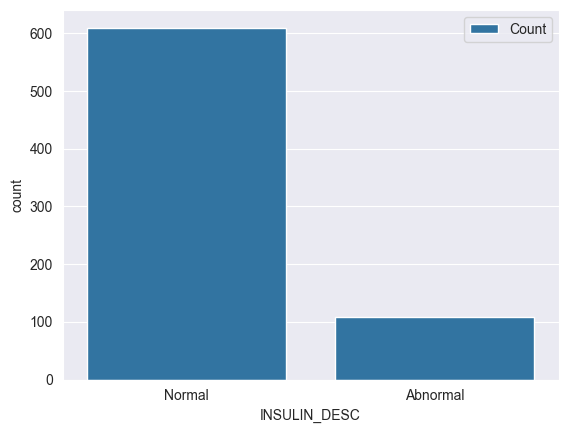

In [144]:
sns.countplot(data=diabetes_DS2, x = 'INSULIN_DESC', label='Count')

AB, NB = diabetes_DS2['INSULIN_DESC'].value_counts()
print('Number of patients Having Abnormal Insulin Levels: ',AB)
print('Number of patients Having Normal Insulin Levels: ',NB)

Number of patients Having Underweight BMI Index:  446
Number of patients Having Healthy BMI Index:  172
Number of patients Having Overweigth BMI Index:  97
Number of patients Having Obese BMI Index:  4


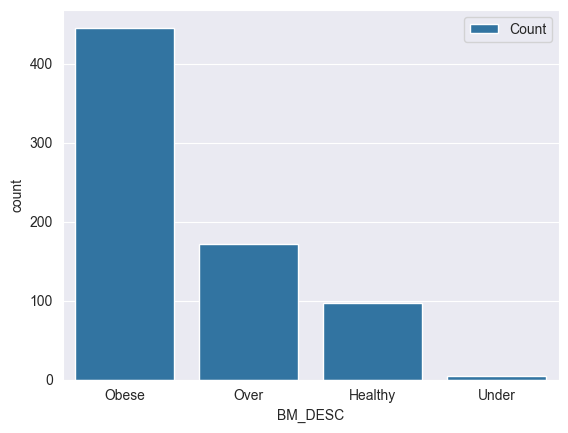

In [145]:
sns.countplot(data=diabetes_DS2, x = 'BM_DESC', label='Count')

UD,H,OV,OB = diabetes_DS2['BM_DESC'].value_counts()
print('Number of patients Having Underweight BMI Index: ',UD)
print('Number of patients Having Healthy BMI Index: ',H)
print('Number of patients Having Overweigth BMI Index: ',OV)
print('Number of patients Having Obese BMI Index: ',OB)

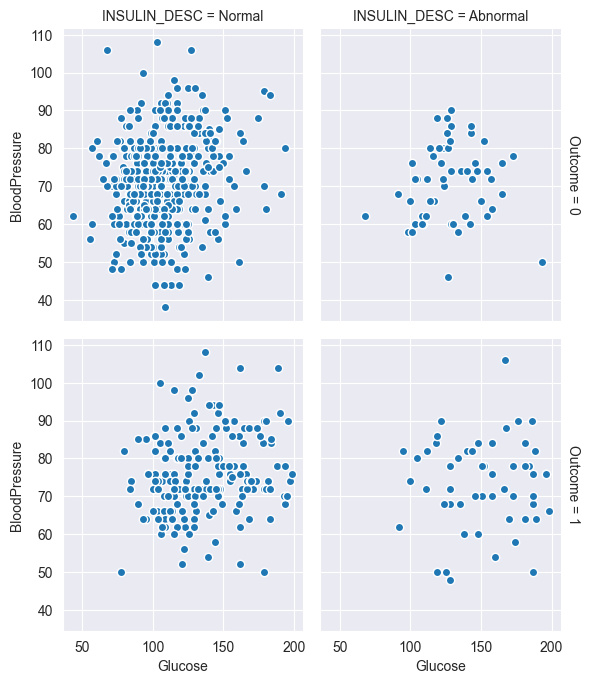

In [146]:
g = sns.FacetGrid(diabetes_DS2, col="INSULIN_DESC", row="Outcome", margin_titles=True)
g.map(plt.scatter,"Glucose", "BloodPressure",  edgecolor="w")
plt.subplots_adjust(top=1.1)

In [147]:
diabetes_DS2=pd.get_dummies(diabetes_DS2)

In [148]:
# Assuming your DataFrame is named diabetes_DS2
diabetes_DS2['BM_DESC_Healthy'] = pd.factorize(diabetes_DS2['BM_DESC_Healthy'])[0]
diabetes_DS2['BM_DESC_Obese'] = pd.factorize(diabetes_DS2['BM_DESC_Obese'])[0]
diabetes_DS2['BM_DESC_Over'] = pd.factorize(diabetes_DS2['BM_DESC_Over'])[0]
diabetes_DS2['INSULIN_DESC_Abnormal'] = pd.factorize(diabetes_DS2['INSULIN_DESC_Abnormal'])[0]
diabetes_DS2['INSULIN_DESC_Normal'] = pd.factorize(diabetes_DS2['INSULIN_DESC_Normal'])[0]

In [149]:
diabetes_DS2.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
BM_DESC_Healthy               int64
BM_DESC_Obese                 int64
BM_DESC_Over                  int64
BM_DESC_Under                  bool
INSULIN_DESC_Abnormal         int64
INSULIN_DESC_Normal           int64
dtype: object

In [150]:
diabetes_DS2.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
BM_DESC_Healthy             0
BM_DESC_Obese               0
BM_DESC_Over                0
BM_DESC_Under               0
INSULIN_DESC_Abnormal       0
INSULIN_DESC_Normal         0
dtype: int64

In [151]:
cols_drop=['Outcome','BM_DESC_Under']
X=diabetes_DS2.drop(cols_drop,axis=1)
Y = diabetes_DS2['Outcome']

In [152]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [153]:
X[0:5]

array([[ 0.65875016,  0.94471568, -0.02395982,  0.95054337, -0.6834586 ,
         0.22664342,  0.62910294,  1.51108259, -0.39490322, -0.78237307,
        -0.56075165, -0.42271565, -0.42271565],
       [-0.8671563 , -1.18205666, -0.5540247 ,  0.24837828, -0.6834586 ,
        -0.8552006 , -0.34756579, -0.17007217, -0.39490322,  1.2781626 ,
         1.78332065, -0.42271565, -0.42271565],
       [ 1.26911274,  2.12625587, -0.730713  , -0.4537868 , -0.6834586 ,
        -1.36521278,  0.78834241, -0.08159034,  2.53226601,  1.2781626 ,
        -0.56075165, -0.42271565, -0.42271565],
       [-0.8671563 , -1.04702349, -0.5540247 , -0.4537868 ,  0.13950544,
        -0.62337688, -0.99867828, -1.05489046, -0.39490322,  1.2781626 ,
         1.78332065, -0.42271565, -0.42271565],
       [ 0.35356887, -0.13554963,  0.15272848, -0.4537868 , -0.6834586 ,
        -1.00974975, -0.87836401, -0.258554  , -0.39490322,  1.2781626 ,
         1.78332065, -0.42271565, -0.42271565]])

In [154]:
Y.head()

0    1
1    0
2    1
3    0
5    0
Name: Outcome, dtype: int64

In [155]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, stratify=Y, random_state=42)

In [156]:
print(X.shape, X_train.shape, X_test.shape)

(719, 13) (575, 13) (144, 13)


# Logistic regression

In [157]:
from sklearn.linear_model import LogisticRegression

In [158]:
logisticregression = LogisticRegression(solver='lbfgs', max_iter=200)

In [159]:
logisticregression.fit(X_train,Y_train)

LogisticRegression(max_iter=200)

In [160]:
round(logisticregression.score(X_train, Y_train)*100, 2)

77.39

In [161]:
round(logisticregression.score(X_test, Y_test)*100, 2)

79.17

In [162]:
from sklearn.metrics import classification_report

In [163]:
Y_pred = logisticregression.predict(X_test)
Y_test_pred = pd.DataFrame({
    'Y_test': Y_test,
    'Y_pred': Y_pred
})
Y_test_pred.head()

,Y_test,Y_pred
674,0,0
283,1,1
368,0,0
661,1,1
359,1,1


In [164]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)

array([[84, 12],
       [18, 30]], dtype=int64)

In [165]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        96
           1       0.71      0.62      0.67        48

    accuracy                           0.79       144
   macro avg       0.77      0.75      0.76       144
weighted avg       0.79      0.79      0.79       144



In [166]:
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)

# Calculate precision-recall curve
precision_curve, recall_curve, _ = precision_recall_curve(Y_test, Y_pred)

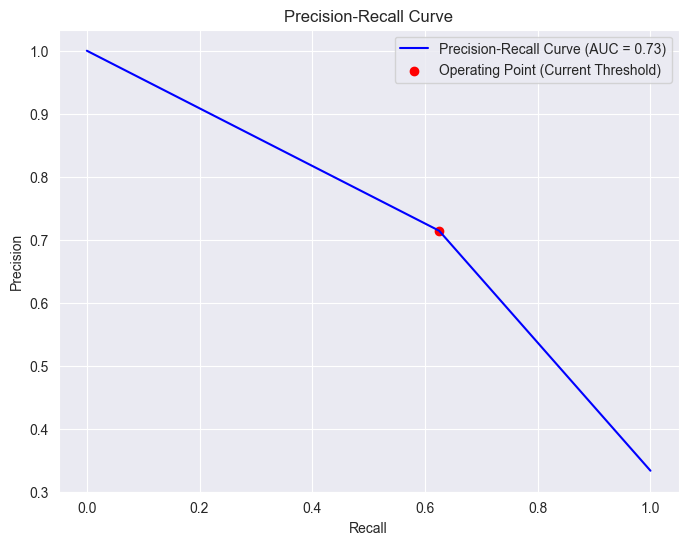

In [167]:
# Plot precision-recall curve
area_under_curve = auc(recall_curve, precision_curve)
plt.figure(figsize=(8, 6))
plt.plot(recall_curve, precision_curve, label=f'Precision-Recall Curve (AUC = {area_under_curve:.2f})', color='b')
plt.scatter(recall, precision, color='r', marker='o', label='Operating Point (Current Threshold)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

In [168]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, _ = roc_curve(Y_test, Y_pred)
roc_auc = roc_auc_score(Y_test, Y_pred)


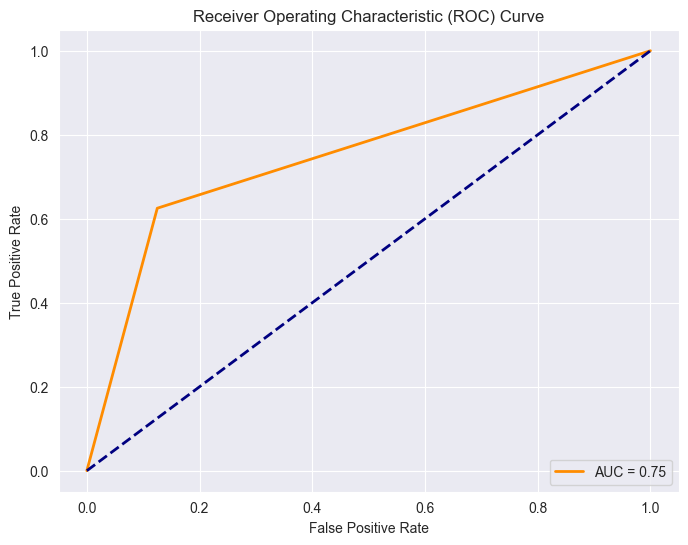

In [169]:

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# MLP model with tensorflow

In [170]:
X_train_scaled =  X_train
X_test_scaled =  X_test

In [171]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [172]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='MSE',
              metrics=['accuracy' , tf.keras.metrics.AUC()])

# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                448       
                                                                 
 dense_9 (Dense)             (None, 16)                528       
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1121 (4.38 KB)
Trainable params: 1121 (4.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [173]:
history = model.fit(X_train_scaled, Y_train, epochs=100 , batch_size=10, validation_split=0.2)

Epoch 1/100
46/46 [==============================] - 1s 3ms/step - loss: 0.2282 - accuracy: 0.6413 - auc_2: 0.6131 - val_loss: 0.2162 - val_accuracy: 0.6609 - val_auc_2: 0.6321
Epoch 2/100
46/46 [==============================] - 0s 1ms/step - loss: 0.1884 - accuracy: 0.7130 - auc_2: 0.7761 - val_loss: 0.1905 - val_accuracy: 0.7043 - val_auc_2: 0.7599
Epoch 3/100
46/46 [==============================] - 0s 1ms/step - loss: 0.1709 - accuracy: 0.7630 - auc_2: 0.8166 - val_loss: 0.1782 - val_accuracy: 0.7391 - val_auc_2: 0.7982
Epoch 4/100
46/46 [==============================] - 0s 1ms/step - loss: 0.1607 - accuracy: 0.7761 - auc_2: 0.8318 - val_loss: 0.1745 - val_accuracy: 0.7130 - val_auc_2: 0.8067
Epoch 5/100
46/46 [==============================] - 0s 1ms/step - loss: 0.1539 - accuracy: 0.7761 - auc_2: 0.8442 - val_loss: 0.1699 - val_accuracy: 0.7217 - val_auc_2: 0.8182
Epoch 6/100
46/46 [==============================] - 0s 1ms/step - loss: 0.1476 - accuracy: 0.7848 - auc_2: 0.8530 

In [174]:
# Evaluate the model on the test set
test_loss, test_accuracy, test_auc = model.evaluate(X_test_scaled, Y_test)
print(f'\nTest Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test AUC: {test_auc:.4f}')

5/5 [==============================] - 0s 1ms/step - loss: 0.1709 - accuracy: 0.7639 - auc_2: 0.8487

Test Accuracy: 76.39%
Test AUC: 0.8487


In [175]:
 # Predict probabilities on the test set
y_pred  = model.predict(X_test_scaled)
y_pred = np.where(y_pred >= 0.5, 1, 0)


5/5 [==============================] - 0s 750us/step


In [176]:
confusion_matrix(Y_test, y_pred)

array([[76, 20],
       [14, 34]], dtype=int64)

In [177]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.82        96
           1       0.63      0.71      0.67        48

    accuracy                           0.76       144
   macro avg       0.74      0.75      0.74       144
weighted avg       0.77      0.76      0.77       144



In [178]:


# Calculate precision and recall
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)

# Calculate precision-recall curve
precision_curve, recall_curve, _ = precision_recall_curve(Y_test, y_pred)


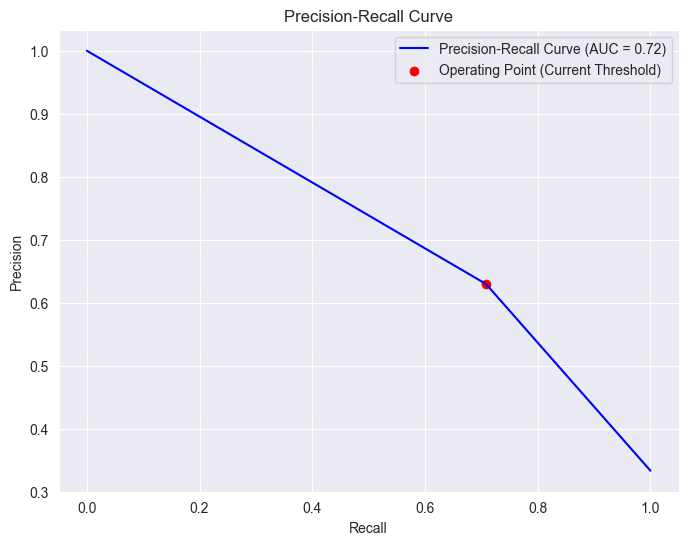

In [179]:
# Plot precision-recall curve
area_under_curve = auc(recall_curve, precision_curve)
plt.figure(figsize=(8, 6))
plt.plot(recall_curve, precision_curve, label=f'Precision-Recall Curve (AUC = {area_under_curve:.2f})', color='b')
plt.scatter(recall, precision, color='r', marker='o', label='Operating Point (Current Threshold)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

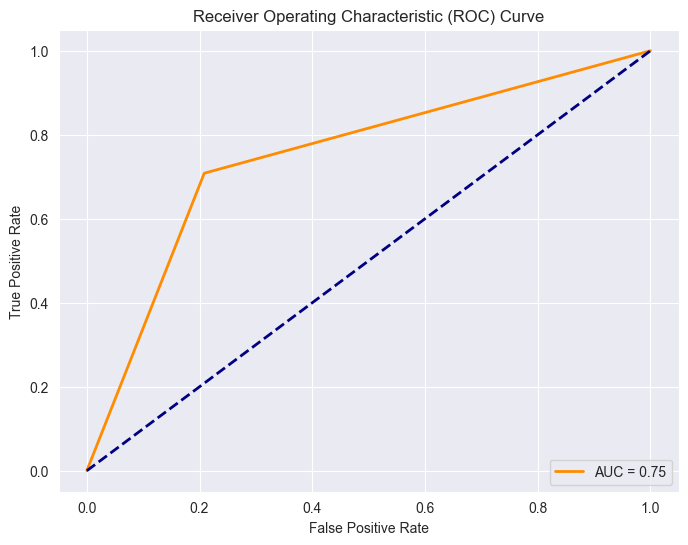

In [180]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(Y_test, y_pred)
roc_auc = roc_auc_score(Y_test, y_pred)
#roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

